# Shardul P Nazirkar

Github username - shardul1704

# Prediciting Energy Output using the Combined Power Plant Data Set
https://archive.ics.uci.edu/ml/datasets/Combined+Cycle+Power+Plant

## Importing necessary libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import statsmodels.formula.api as smf
import math
from tabulate import tabulate
from sklearn.preprocessing import PolynomialFeatures
from statsmodels.stats.outliers_influence import OLSInfluence
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import MinMaxScaler
from statsmodels.tools import eval_measures
import statsmodels.api as sm

## 1. (a) Dataset 

In [2]:
df=pd.read_excel('../data/Folds5x2_pp.xlsx')
df.head()

,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90


## 1. (b) i. Rows and Columns

In [3]:
df.shape
print('Rows : ',df.shape[0])
print('Columns : ',df.shape[1])

Rows :  9568
Columns :  5


There are 9568 rows and 5 columns. The features consist of hourly average ambient variables Temperature (AT), Ambient Pressure (AP), Relative Humidity (RH) and Exhaust Vacuum (V) to predict the net hourly electrical energy output (PE) of the plant.

## 1. (b) ii. Scatterplots

<AxesSubplot:xlabel='PE', ylabel='RH'>

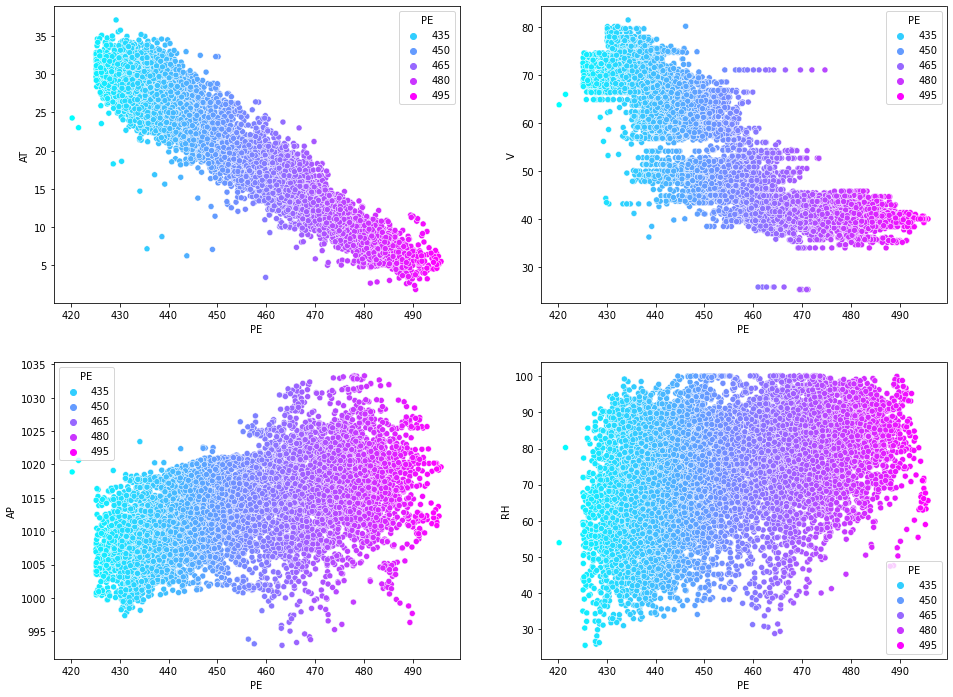

In [4]:
plt.figure(figsize=(16,12))
ax=plt.subplot(2,2,1)
sns.scatterplot(data=df, x='PE', y='AT',hue='PE',ax=ax,palette='cool')
ax=plt.subplot(2,2,2)
sns.scatterplot(data=df, x='PE', y='V',hue='PE',ax=ax,palette='cool')
ax=plt.subplot(2,2,3)
sns.scatterplot(data=df, x='PE', y='AP',hue='PE',ax=ax,palette='cool')
ax=plt.subplot(2,2,4)
sns.scatterplot(data=df, x='PE', y='RH',hue='PE',ax=ax,palette='cool')

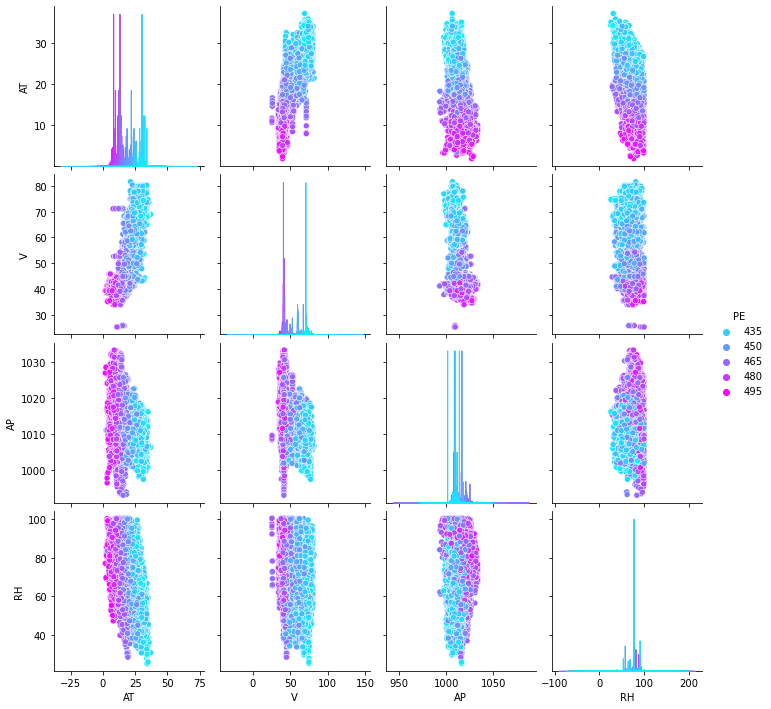

In [5]:
sns.pairplot(df,kind="scatter",hue='PE',palette='cool')

From the scatter plots, we can visually infer that a Linear Regression model would fit well for the data. There is a presence of outliers in (PE vs AT), (PE vs V) and (PE vs AP) plots that may influence the Linear Regression model's accuracy.

## 1. (b) iii. Mean, median, range, i quartile, iii quartile and IQR of variables

In [6]:
def column_ranges(d):
    Q3 = np.quantile(d, 0.75)
    Q1 = np.quantile(d, 0.25)
    IQR = Q3 - Q1
    mean=np.mean(d)
    median=np.median(d)
    range1=np.max(d)-np.min(d)
    result=[]
    result.append(np.round(mean,2))
    result.append(np.round(median,2))
    result.append(np.round(range1,2))
    result.append(np.round(Q1,2))
    result.append(np.round(Q3,2))
    result.append(np.round(IQR,2))
    return result

In [7]:
ATranges = column_ranges(df['AT'])
ATranges.insert(0,'AT')
Vranges = column_ranges(df['V'])
Vranges.insert(0,'V')
APranges = column_ranges(df['AP'])
APranges.insert(0,'AP')
RHranges = column_ranges(df['RH'])
RHranges.insert(0,'RH')
PEranges = column_ranges(df['PE'])
PEranges.insert(0,'PE')

print('Var\tMean\tMedian\tRange\tQ1\tQ3\tIQR')

for i in range(7):
    print(ATranges[i], end ="\t")
print()
for i in range(7):
    print(Vranges[i], end ="\t")
print()
for i in range(7):
    print(APranges[i], end ="\t")
print()
for i in range(7):
    print(RHranges[i], end ="\t")
print()
for i in range(7):
    print(PEranges[i], end ="\t")

Var	Mean	Median	Range	Q1	Q3	IQR
AT	19.65	20.34	35.3	13.51	25.72	12.21	
V	54.31	52.08	56.2	41.74	66.54	24.8	
AP	1013.26	1012.94	40.41	1009.1	1017.26	8.16	
RH	73.31	74.97	74.6	63.33	84.83	21.5	
PE	454.37	451.55	75.5	439.75	468.43	28.68	

## 1. (c) Linear Regression Models

In [8]:
ATmodel = smf.ols(formula='PE ~ AT', data=df).fit()

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.899
Model:                            OLS   Adj. R-squared:                  0.899
Method:                 Least Squares   F-statistic:                 8.510e+04
Date:                Fri, 23 Sep 2022   Prob (F-statistic):               0.00
Time:                        23:51:22   Log-Likelihood:                -29756.
No. Observations:                9568   AIC:                         5.952e+04
Df Residuals:                    9566   BIC:                         5.953e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    497.0341      0.156   3177.280      0.0

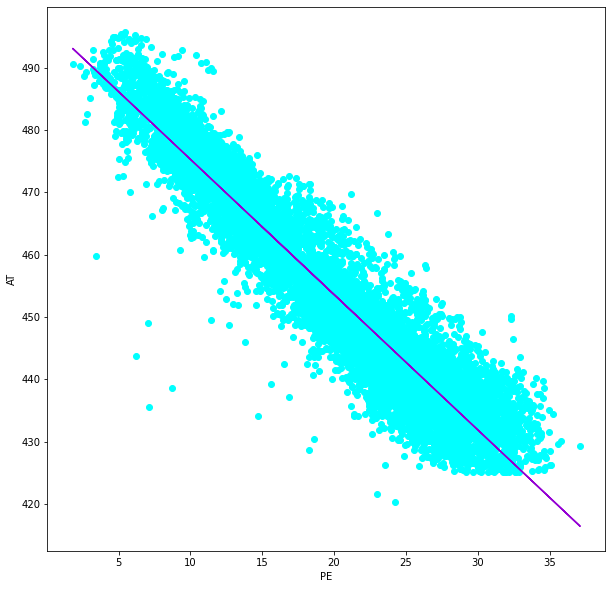

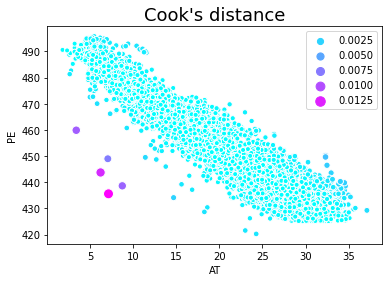

In [9]:
print(ATmodel.summary())
ATpred = ATmodel.predict()

plt.figure(figsize=(10,10))
plt.plot(df['AT'], df['PE'], 'o',color='aqua')           
plt.plot(df['AT'], ATpred, color='darkviolet')   
plt.xlabel('PE')
plt.ylabel('AT')
plt.show()

cook_distance = OLSInfluence(ATmodel).cooks_distance
(distance, p_value) = cook_distance
sns.scatterplot(x=df['AT'], y=df['PE'], data=df, hue=distance, palette='cool', size=distance, sizes=(25, 100), linewidth=1)
plt.title('Cook\'s distance', fontsize=18);

#### PE vs AT
As seen from the plot, the model fits well to the AT data. We have P-value equal to 0 which suggests that there is a statistically signifcant association between the predictor(AT) and the response(PE). We also get a high R-squared value which suggests that 89% of the variability observed in the PE is explained by the regression model.

The second plot shows that there are a few data points that have high Cook's distances indicating that they may be outliers. Removing them can increase the accuracy of the model.


                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.757
Model:                            OLS   Adj. R-squared:                  0.756
Method:                 Least Squares   F-statistic:                 2.972e+04
Date:                Fri, 23 Sep 2022   Prob (F-statistic):               0.00
Time:                        23:51:23   Log-Likelihood:                -33963.
No. Observations:                9568   AIC:                         6.793e+04
Df Residuals:                    9566   BIC:                         6.794e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    517.8015      0.378   1370.218      0.0

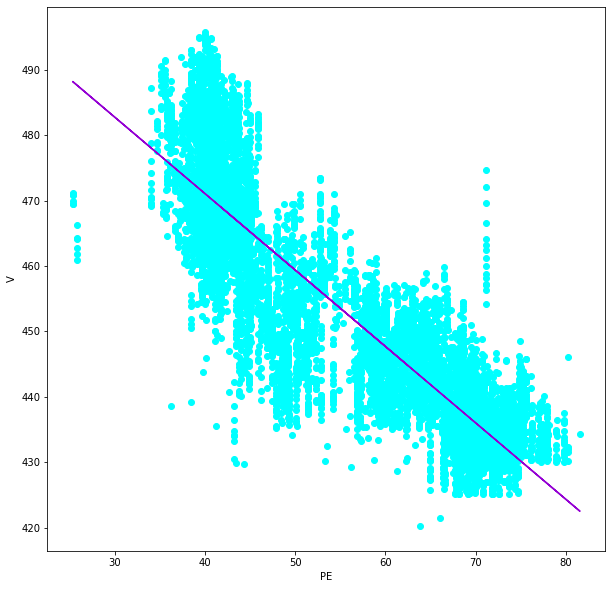

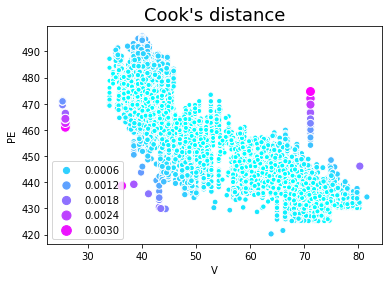

In [10]:
Vmodel = smf.ols(formula='PE ~ V', data=df).fit()
print(Vmodel.summary())
Vpred = Vmodel.predict()
plt.figure(figsize=(10,10))
plt.plot(df['V'],df['PE'],'o',color='aqua')
plt.plot(df['V'],Vpred,color='darkviolet')
plt.xlabel('PE')
plt.ylabel('V')
plt.show()

cook_distance = OLSInfluence(Vmodel).cooks_distance
(distance, p_value) = cook_distance
sns.scatterplot(x=df['V'], y=df['PE'], data=df, hue=distance, palette='cool', size=distance, sizes=(25, 100), linewidth=1)
plt.title('Cook\'s distance', fontsize=18);

#### PE vs AT
As seen from the plot, the model fits well to the V data. We have P-value equal to 0 which suggests that there is a statistically signifcant association between the predictor(V) and the response(PE). We also get a high R-squared value which suggests that 75% of the variability observed in the PE is explained by the regression model.

The second plot shows that there are a lot of data points that have high Cook's distances indicating that they may be outliers. Removing them can increase the accuracy of the model.

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.269
Model:                            OLS   Adj. R-squared:                  0.269
Method:                 Least Squares   F-statistic:                     3516.
Date:                Fri, 23 Sep 2022   Prob (F-statistic):               0.00
Time:                        23:51:23   Log-Likelihood:                -39224.
No. Observations:                9568   AIC:                         7.845e+04
Df Residuals:                    9566   BIC:                         7.847e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1055.2610     25.459    -41.449      0.0

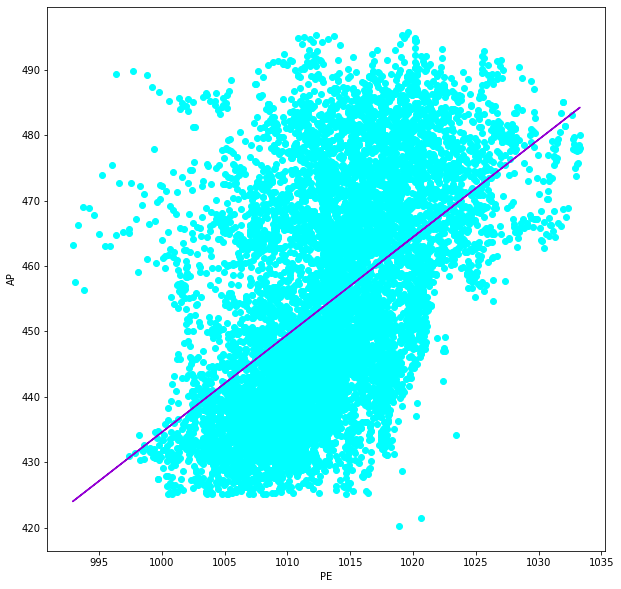

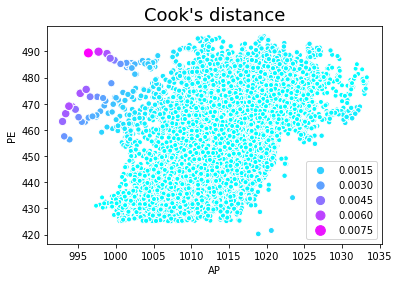

In [11]:
APmodel = smf.ols(formula='PE ~ AP', data=df).fit()
print(APmodel.summary())
APpred = APmodel.predict()
plt.figure(figsize=(10,10))
plt.plot(df['AP'],df['PE'],'o',color='aqua')
plt.plot(df['AP'],APpred,color='darkviolet')
plt.xlabel('PE')
plt.ylabel('AP')
plt.show()

cook_distance = OLSInfluence(APmodel).cooks_distance
(distance, p_value) = cook_distance
sns.scatterplot(x=df['AP'], y=df['PE'], data=df, hue=distance, palette='cool', size=distance, sizes=(25, 100), linewidth=1)
plt.title('Cook\'s distance', fontsize=18);

#### PE vs AP
We have P-value equal to 0 which suggests that there is a statistically signifcant association between the predictor(AP) and the response(PE).
We get a comparitively low R-squared value which suggests that only 26% of the variability observed in the PE is explained by the regression model.

The low R-squared value and plot suggests that the model may not be well-fit for the AP data.

The second plot shows that there are some data points that have high Cook's distances indicating that they may be outliers. Removing them can increase the accuracy of the model.

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.152
Model:                            OLS   Adj. R-squared:                  0.152
Method:                 Least Squares   F-statistic:                     1714.
Date:                Fri, 23 Sep 2022   Prob (F-statistic):               0.00
Time:                        23:51:24   Log-Likelihood:                -39933.
No. Observations:                9568   AIC:                         7.987e+04
Df Residuals:                    9566   BIC:                         7.988e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    420.9618      0.823    511.676      0.0

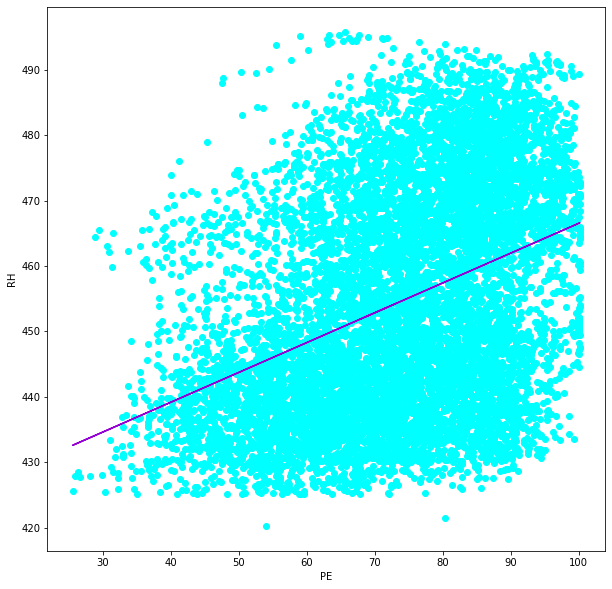

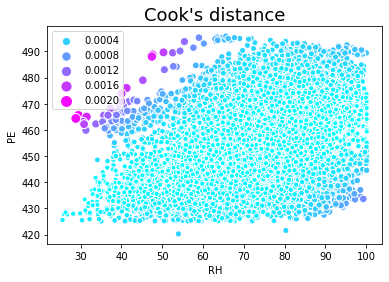

In [12]:
RHmodel = smf.ols(formula='PE ~ RH', data=df).fit()
print(RHmodel.summary())
RHpred = RHmodel.predict()
plt.figure(figsize=(10,10))
plt.plot(df['RH'],df['PE'],'o',color='aqua')
plt.plot(df['RH'],RHpred,color='darkviolet')
plt.xlabel('PE')
plt.ylabel('RH')
plt.show()

cook_distance = OLSInfluence(RHmodel).cooks_distance
(distance, p_value) = cook_distance
sns.scatterplot(x=df['RH'], y=df['PE'], data=df, hue=distance, palette='cool', size=distance, sizes=(25, 100), linewidth=1)
plt.title('Cook\'s distance', fontsize=18);

#### PE vs RH
We have P-value equal to 0 which suggests that there is a statistically signifcant association between the predictor(RH) and the response(PE).
We get a very low R-squared value which suggests that only 15% of the variability observed in the PE is explained by the regression model.

The low R-squared value and plot suggests that the model may not be well-fit for the RH data.

The second plot shows that there many data points that have high Cook's distances indicating that they may be outliers. Removing them can increase the accuracy of the model.

## 1. (d) Multiple Regression Model

In [13]:
Mulmodel = smf.ols(formula='PE ~ AT+V+AP+RH', data=df).fit()
print(Mulmodel.summary())

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                 3.114e+04
Date:                Fri, 23 Sep 2022   Prob (F-statistic):               0.00
Time:                        23:51:25   Log-Likelihood:                -28088.
No. Observations:                9568   AIC:                         5.619e+04
Df Residuals:                    9563   BIC:                         5.622e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    454.6093      9.749     46.634      0.0

### Multiple Regression Model
From above results, we can see that the model has a very good R-squared value of 92%. This suggests that the model is very well fit for all predictors combined.
    The P-value for all the predictors is 0, indicating that all the predictors are statistically significant. As the P-value is less than alpha (0.05), we can reject the null hypothesis H0 : $ \beta$ j = 0 for all the predictors.

## 1. (e) Univariate coefficients vs Multivariate coefficients

When we compare the results from 1.(c) and 1.(d), we see that the R-squared value is more when the predictors are considered together in a multiple regression model as compared to simple linear models.

When comparing the Regression coefficients, there is a trend of the individual coefficients being smaller in multiple regression model versus to their counter-parts in simple linear regression models. Infact, the variable 'RH' has positive coefficient in simple model while it has a negative coefficient in multiple regression model.

Univariate Regression Coefficient 
 [-2.1713199585178065, -1.16813512655571, 1.4898716733991078, 0.45565010226298097]

Multivariate Regression Coefficient 
 [-1.977513106635383, -0.2339164225825034, 0.06208294378085044, -0.15805410291641045]


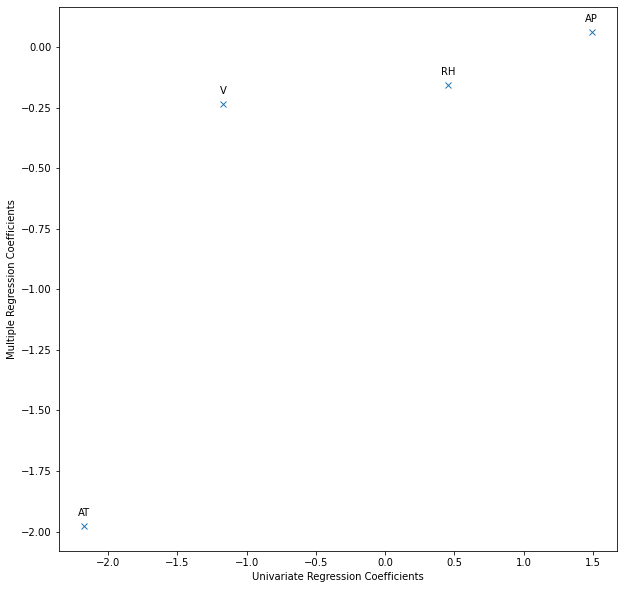

In [14]:
Univariate=[]
Univariate.append(ATmodel.params[1])
Univariate.append(Vmodel.params[1])
Univariate.append(APmodel.params[1])
Univariate.append(RHmodel.params[1])
print('Univariate Regression Coefficient \n',Univariate)
Multivariate=list(Mulmodel.params[1:])
print('\nMultivariate Regression Coefficient \n',Multivariate)
plt.figure(figsize=(10,10))
plt.plot(Univariate,Multivariate,'x')
plt.annotate('AT',(Univariate[0],Multivariate[0]),textcoords="offset points",xytext=(0,10),ha='center')
plt.annotate('V',(Univariate[1],Multivariate[1]),textcoords="offset points",xytext=(0,10),ha='center')
plt.annotate('AP',(Univariate[2],Multivariate[2]),textcoords="offset points",xytext=(0,10),ha='center')
plt.annotate('RH',(Univariate[3],Multivariate[3]),textcoords="offset points",xytext=(0,10),ha='center')
plt.xlabel('Univariate Regression Coefficients')
plt.ylabel('Multiple Regression Coefficients')
plt.show()

## 1. (f) Non-linear association between predictor and respone

In [15]:
ypoly = df['AT'].values.reshape(-1,1)
polynomial_features= PolynomialFeatures(degree=3)
ATpoly = polynomial_features.fit_transform(ypoly)
ATpolymodel = smf.ols(formula='PE ~ ATpoly', data=df).fit()
print(ATpolymodel.summary())

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.912
Model:                            OLS   Adj. R-squared:                  0.912
Method:                 Least Squares   F-statistic:                 3.299e+04
Date:                Fri, 23 Sep 2022   Prob (F-statistic):               0.00
Time:                        23:51:25   Log-Likelihood:                -29101.
No. Observations:                9568   AIC:                         5.821e+04
Df Residuals:                    9564   BIC:                         5.824e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    246.3641      0.336    732.248      0.0

In [16]:
ypoly = df['V'].values.reshape(-1,1)
polynomial_features= PolynomialFeatures(degree=3)
Vpoly = polynomial_features.fit_transform(ypoly)
Vpolymodel = smf.ols(formula='PE ~ Vpoly', data=df).fit()
print(Vpolymodel.summary())

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.775
Model:                            OLS   Adj. R-squared:                  0.775
Method:                 Least Squares   F-statistic:                 1.098e+04
Date:                Fri, 23 Sep 2022   Prob (F-statistic):               0.00
Time:                        23:51:25   Log-Likelihood:                -33585.
No. Observations:                9568   AIC:                         6.718e+04
Df Residuals:                    9564   BIC:                         6.721e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    277.0734      4.575     60.557      0.0

In [17]:
ypoly = df['AP'].values.reshape(-1,1)
polynomial_features= PolynomialFeatures(degree=3)
APpoly = polynomial_features.fit_transform(ypoly)
APpolymodel = smf.ols(formula='PE ~ APpoly', data=df).fit()
print(APpolymodel.summary())

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.275
Model:                            OLS   Adj. R-squared:                  0.275
Method:                 Least Squares   F-statistic:                     1813.
Date:                Fri, 23 Sep 2022   Prob (F-statistic):               0.00
Time:                        23:51:25   Log-Likelihood:                -39184.
No. Observations:                9568   AIC:                         7.837e+04
Df Residuals:                    9565   BIC:                         7.840e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0747      0.009      8.415      0.0

In [18]:
ypoly = df['RH'].values.reshape(-1,1)
polynomial_features= PolynomialFeatures(degree=3)
RHpoly = polynomial_features.fit_transform(ypoly)
RHpolymodel = smf.ols(formula='PE ~ RHpoly', data=df).fit()
print(RHpolymodel.summary())

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.154
Model:                            OLS   Adj. R-squared:                  0.153
Method:                 Least Squares   F-statistic:                     579.2
Date:                Fri, 23 Sep 2022   Prob (F-statistic):               0.00
Time:                        23:51:25   Log-Likelihood:                -39923.
No. Observations:                9568   AIC:                         7.985e+04
Df Residuals:                    9564   BIC:                         7.988e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    234.2068      5.272     44.422      0.0

### Observations
From the above results, we can observe that there is evidence of some of the predictors having non-linear association with the response.

The predictor AT results in a well-fit model of degree equal to 3. The R-squared value is 91%, which is a marginal increase over  the same with a simple linear model. The P-value is 0 for the polynomial model indicating its statistical-significance.

The predictor V results in a R-squared value of 77.5%. The P-value for 2nd degree is 0.768 which is much more than alpha (0.05). This indicates that the 2nd degree term is not statistically significant and does not reject the null hypothesis.

The predictors AP and RH have an R-squared value of 27.5% and 15.4% respectively, which is a marginal improvement over their simple linear regression model values and is still low. This indicates that the models are not well-fit. The P-value is 0 in both cases suggesting statistical significance.

## 1. (g) Pairwise Interaction terms

In [19]:
ATVmodel = smf.ols(formula='PE ~ AT+V', data=df).fit()
print(ATVmodel.summary())

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.916
Model:                            OLS   Adj. R-squared:                  0.916
Method:                 Least Squares   F-statistic:                 5.197e+04
Date:                Fri, 23 Sep 2022   Prob (F-statistic):               0.00
Time:                        23:51:25   Log-Likelihood:                -28887.
No. Observations:                9568   AIC:                         5.778e+04
Df Residuals:                    9565   BIC:                         5.780e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    505.4774      0.240   2101.855      0.0

In [20]:
ATAPmodel = smf.ols(formula='PE ~ AT+AP', data=df).fit()
print(ATAPmodel.summary())

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.901
Model:                            OLS   Adj. R-squared:                  0.901
Method:                 Least Squares   F-statistic:                 4.343e+04
Date:                Fri, 23 Sep 2022   Prob (F-statistic):               0.00
Time:                        23:51:25   Log-Likelihood:                -29667.
No. Observations:                9568   AIC:                         5.934e+04
Df Residuals:                    9565   BIC:                         5.936e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    349.9505     10.969     31.902      0.0

In [21]:
ATRHmodel = smf.ols(formula='PE ~ AT+RH', data=df).fit()
print(ATRHmodel.summary())

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.921
Model:                            OLS   Adj. R-squared:                  0.921
Method:                 Least Squares   F-statistic:                 5.572e+04
Date:                Fri, 23 Sep 2022   Prob (F-statistic):               0.00
Time:                        23:51:25   Log-Likelihood:                -28582.
No. Observations:                9568   AIC:                         5.717e+04
Df Residuals:                    9565   BIC:                         5.719e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    516.4765      0.401   1286.588      0.0

In [22]:
VAPmodel = smf.ols(formula='PE ~ V+AP', data=df).fit()
print(VAPmodel.summary())

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.787
Model:                            OLS   Adj. R-squared:                  0.787
Method:                 Least Squares   F-statistic:                 1.766e+04
Date:                Fri, 23 Sep 2022   Prob (F-statistic):               0.00
Time:                        23:51:25   Log-Likelihood:                -33325.
No. Observations:                9568   AIC:                         6.666e+04
Df Residuals:                    9565   BIC:                         6.668e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -45.6656     15.255     -2.993      0.0

In [23]:
VRHmodel = smf.ols(formula='PE ~ V+RH', data=df).fit()
print(VRHmodel.summary())

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.772
Model:                            OLS   Adj. R-squared:                  0.772
Method:                 Least Squares   F-statistic:                 1.619e+04
Date:                Fri, 23 Sep 2022   Prob (F-statistic):               0.00
Time:                        23:51:25   Log-Likelihood:                -33649.
No. Observations:                9568   AIC:                         6.730e+04
Df Residuals:                    9565   BIC:                         6.732e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    503.5895      0.667    755.404      0.0

In [24]:
APRHmodel = smf.ols(formula='PE ~ AP+RH', data=df).fit()
print(APRHmodel.summary())

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.384
Model:                            OLS   Adj. R-squared:                  0.384
Method:                 Least Squares   F-statistic:                     2985.
Date:                Fri, 23 Sep 2022   Prob (F-statistic):               0.00
Time:                        23:51:25   Log-Likelihood:                -38402.
No. Observations:                9568   AIC:                         7.681e+04
Df Residuals:                    9565   BIC:                         7.683e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -985.4949     23.422    -42.076      0.0

### Observations
From the above results we can infer that there is strong evidence of association of interactions of predictors with the response. The pairs of (AT,V), (AT,AP), (AT,RH), (V,AP) and (V,RH) have high R-squared values suggesting good fit on the data. The pair of AP and RH has comparitively low R-squared value of 38% suggesting the model is well-fit to the data. The P-values for all the pairs is 0 suggesting statistical significance.

## 1. (h) Improved Model

In [25]:
train,test= train_test_split(df,random_state = 42, test_size = 0.30)
model1 = smf.ols('PE ~ AT+V+AP+RH', data = train ).fit()
print(model1.summary())

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                 2.194e+04
Date:                Fri, 23 Sep 2022   Prob (F-statistic):               0.00
Time:                        23:51:25   Log-Likelihood:                -19630.
No. Observations:                6697   AIC:                         3.927e+04
Df Residuals:                    6692   BIC:                         3.930e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    467.8414     11.502     40.673      0.0

In [26]:
X_test = test.drop('PE', axis = 1)
model1pred = model1.predict(X_test)
model1mse = eval_measures.mse(model1pred, test['PE'], axis=0)
model1mse

21.23985693822527

In [27]:
X1 = df[['AT','V','AP','RH']]
Y1 = df['PE']
x_train,x_test,y_train,y_test = train_test_split(X1,Y1, random_state=42, test_size=.30)
polynomial_features= PolynomialFeatures(degree=2)
x2degree = polynomial_features.fit_transform(x_train)
x2degree.shape
model2 = sm.OLS(y_train, x2degree).fit()
pred = model2.predict(x2degree)

coef = model2.params
feat = polynomial_features.get_feature_names(df.columns)
data1 = {'Feats':feat,'Coefs':coef}
data2 = pd.DataFrame(data1)
data2

C:\Users\shard\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,Feats,Coefs
const,1,-7664.980854
x1,AT,-7.288543
x2,V,-1.958957
x3,AP,15.930817
x4,RH,3.912130
x5,AT^2,0.018495
x6,AT V,0.009465
x7,AT AP,0.004555
x8,AT RH,-0.005260
x9,V^2,-0.000365


In [28]:
data3 = data2.drop(['x7','x9','x10','x11'])
stat_df = pd.DataFrame()
stat_df['AT'] = df['AT']
stat_df['V'] = df['V']
stat_df['AP'] = df['AP']
stat_df['RH'] = df['RH']
stat_df['ATAT'] = df['AT']*df['AT']
stat_df['ATV'] = df['AT']*df['V']
stat_df['ATRH'] = df['AT']*df['RH']
stat_df['APAP'] = df['AP']*df['AP']
stat_df['APRH'] = df['AP']*df['RH']
stat_df['RHRH'] = df['RH']*df['RH']
stat_df['PE'] = df['PE']
stat_df

,AT,V,AP,RH,ATAT,ATV,ATRH,APAP,APRH,RHRH,PE
0,14.96,41.76,1024.07,73.17,223.8016,624.7296,1094.6232,1.048719e+06,74931.2019,5353.8489,463.26
1,25.18,62.96,1020.04,59.08,634.0324,1585.3328,1487.6344,1.040482e+06,60263.9632,3490.4464,444.37
2,5.11,39.40,1012.16,92.14,26.1121,201.3340,470.8354,1.024468e+06,93260.4224,8489.7796,488.56
3,20.86,57.32,1010.24,76.64,435.1396,1195.6952,1598.7104,1.020585e+06,77424.7936,5873.6896,446.48
4,10.82,37.50,1009.23,96.62,117.0724,405.7500,1045.4284,1.018545e+06,97511.8026,9335.4244,473.90
...,...,...,...,...,...,...,...,...,...,...,...
9563,16.65,49.69,1014.01,91.00,277.2225,827.3385,1515.1500,1.028216e+06,92274.9100,8281.0000,460.03
9564,13.19,39.18,1023.67,66.78,173.9761,516.7842,880.8282,1.047900e+06,68360.6826,4459.5684,469.62
9565,31.32,74.33,1012.92,36.48,980.9424,2328.0156,1142.5536,1.026007e+06,36951.3216,1330.7904,429.57
9566,24.48,69.45,1013.86,62.39,599.2704,1700.1360,1527.3072,1.027912e+06,63254.7254,3892.5121,435.74


In [29]:
Train, Test = train_test_split(stat_df, random_state=42 , test_size=.30)
model2 = smf.ols('PE ~ AT + AP + RH + ATAT + ATV + ATRH + APAP + APRH + RHRH', data = Train )
model2 = model2.fit()
print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.936
Model:                            OLS   Adj. R-squared:                  0.936
Method:                 Least Squares   F-statistic:                 1.095e+04
Date:                Fri, 23 Sep 2022   Prob (F-statistic):               0.00
Time:                        23:51:25   Log-Likelihood:                -19265.
No. Observations:                6697   AIC:                         3.855e+04
Df Residuals:                    6687   BIC:                         3.862e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -9657.0380   1106.254     -8.729      0.0

In [30]:
TestX = Test.drop('PE', axis = 1)
model2pred = model2.predict(TestX)
model2mse = eval_measures.mse(model2pred, Test['PE'], axis=0)
model2mse

19.22101895493081

### Observations

MSE for Model 1 = 21.23

MSE for Model 2 = 19.22

## 1. (i) KNN Regression

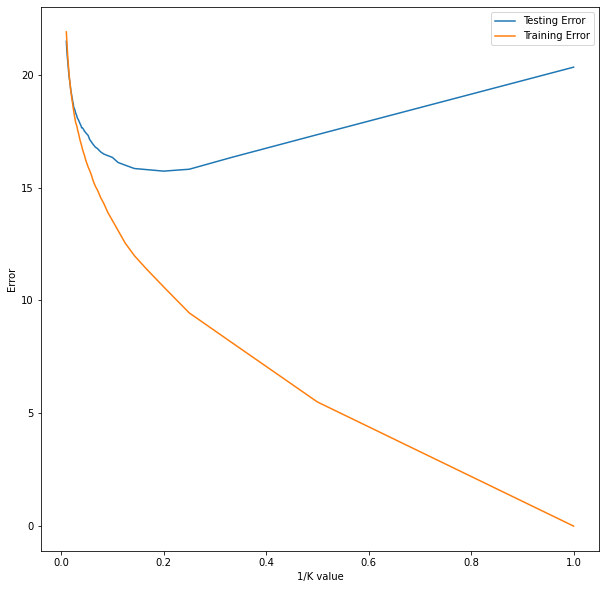

In [31]:
kn = np.arange(1, 100, 1)
train_error = np.empty(len(kn))
test_error = np.empty(len(kn))
onebyk =[]
for i, k in enumerate(kn):
    onebyk.append(1/k)
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(x_train,y_train)
    ptest = knn.predict(x_test)
    ptrain = knn.predict(x_train)
    train_error[i] = eval_measures.mse(ptrain, train['PE'], axis=0)
    test_error[i] = eval_measures.mse(ptest, test['PE'], axis=0)

plt.figure(figsize=(10,10))
plt.plot(onebyk, test_error, label = 'Testing Error')
plt.plot(onebyk, train_error, label = 'Training Error')
plt.xlabel('1/K value')
plt.legend()
plt.ylabel('Error')
plt.show()

In [32]:
r=100
for i in range (2, (len(test_error))):
    if (test_error[i] < r):
        r = test_error[i]
        bestk = kn[i]
print("Lowest Error of",r,"at K equal to",bestk)

Lowest Error of 15.726819842563568 at K equal to 5


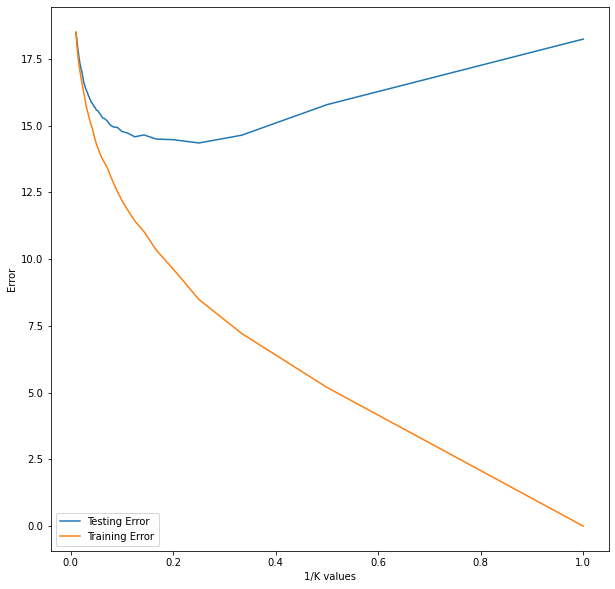

In [33]:
MMS = MinMaxScaler()
x_f = MMS.fit_transform(X1)
X_TRAIN,X_TEST,Y_TRAIN,Y_TEST = train_test_split(x_f,Y1,random_state=42, test_size=.3)

kn = np.arange(1, 100, 1)
train_error1 = np.empty(len(kn))
test_error1 = np.empty(len(kn))
onebyk =[]
for i, k in enumerate(kn):
    onebyk.append(1/k)
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(X_TRAIN,Y_TRAIN)
    ptest = knn.predict(X_TEST)
    ptrain = knn.predict(X_TRAIN)
    train_error1[i] = eval_measures.mse(ptrain, train['PE'], axis=0)
    test_error1[i] = eval_measures.mse(ptest, test['PE'], axis=0)
    
plt.figure(figsize=(10,10))
plt.plot(onebyk, test_error1, label = 'Testing Error')
plt.plot(onebyk, train_error1, label = 'Training Error')
plt.xlabel('1/K values')
plt.legend()
plt.ylabel('Error')
plt.show()

In [34]:
n = 200
i=0
bestk=1
for i in range (2, (len(test_error1))):
    if (test_error1[i] < n):
        n = test_error1[i]
        bestk = kn[i]
print("Lowest Error of",n,"at K equal to",bestk)

Lowest Error of 14.348653474399166 at K equal to 4
